## 1.  Word2Vec implementation - keeping data as sentences (dot not removed)

In [2]:
import nltk
from gensim.models import Word2Vec
import re

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\write\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [13]:
def read_all_lines(filename):
    txt = ''
    try:
        with open(filename) as f:
            lines = f.readlines()
            for line in lines:
                ln = line.rstrip()
                txt += ln + ' '
        return txt
    except IOError:
        print("Error reading file:", filename)

### 1.1 Read the file and print the lines

In [14]:
text_data = read_all_lines('test_schema_wo_label.csv')
print(text_data, )

SecondSchema.cust_name.cust_fname SecondSchema.cust_name.cust_lname SecondSchema.cust_contacts.email_address.email_id SecondSchema.cust_contacts.email_address.email_type SecondSchema.cust_contacts.email_address.last_update_TS SecondSchema.cust_contacts.phones.mobile_phone.area_cd SecondSchema.cust_contacts.phones.mobile_phone.mobile_number SecondSchema.cust_contacts.phones.mobile_phone.lst_updt_ts SecondSchema.cust_contacts.phones.landline_phone.area_cd SecondSchema.cust_contacts.phones.landline_phone.landline_number SecondSchema.cust_contacts.phones.landline_phone.last_update_TS SecondSchema.cust_contacts.postal_address.address_line_1 SecondSchema.cust_contacts.postal_address.address_line_2 SecondSchema.cust_contacts.postal_address.city SecondSchema.cust_contacts.postal_address.state SecondSchema.cust_contacts.postal_address.zip SecondSchema.cust_birthdate.birth_date FirstSchema.customer_name.customer_f_nm FirstSchema.customer_name.customer_l_nm FirstSchema.customer_contacts.email_det

### 1.2 Tokenize text data using nltk sentence tokenizer

In [15]:
text_tokenized = nltk.sent_tokenize(text_data)
for tt in text_tokenized:
    print(tt)

SecondSchema.cust_name.cust_fname SecondSchema.cust_name.cust_lname SecondSchema.cust_contacts.email_address.email_id SecondSchema.cust_contacts.email_address.email_type SecondSchema.cust_contacts.email_address.last_update_TS SecondSchema.cust_contacts.phones.mobile_phone.area_cd SecondSchema.cust_contacts.phones.mobile_phone.mobile_number SecondSchema.cust_contacts.phones.mobile_phone.lst_updt_ts SecondSchema.cust_contacts.phones.landline_phone.area_cd SecondSchema.cust_contacts.phones.landline_phone.landline_number SecondSchema.cust_contacts.phones.landline_phone.last_update_TS SecondSchema.cust_contacts.postal_address.address_line_1 SecondSchema.cust_contacts.postal_address.address_line_2 SecondSchema.cust_contacts.postal_address.city SecondSchema.cust_contacts.postal_address.state SecondSchema.cust_contacts.postal_address.zip SecondSchema.cust_birthdate.birth_date FirstSchema.customer_name.customer_f_nm FirstSchema.customer_name.customer_l_nm FirstSchema.customer_contacts.email_det

In [17]:
text_sentences = [nltk.word_tokenize(sentence) for sentence in text_tokenized]
for ts in text_sentences:
    print(ts)

['SecondSchema.cust_name.cust_fname', 'SecondSchema.cust_name.cust_lname', 'SecondSchema.cust_contacts.email_address.email_id', 'SecondSchema.cust_contacts.email_address.email_type', 'SecondSchema.cust_contacts.email_address.last_update_TS', 'SecondSchema.cust_contacts.phones.mobile_phone.area_cd', 'SecondSchema.cust_contacts.phones.mobile_phone.mobile_number', 'SecondSchema.cust_contacts.phones.mobile_phone.lst_updt_ts', 'SecondSchema.cust_contacts.phones.landline_phone.area_cd', 'SecondSchema.cust_contacts.phones.landline_phone.landline_number', 'SecondSchema.cust_contacts.phones.landline_phone.last_update_TS', 'SecondSchema.cust_contacts.postal_address.address_line_1', 'SecondSchema.cust_contacts.postal_address.address_line_2', 'SecondSchema.cust_contacts.postal_address.city', 'SecondSchema.cust_contacts.postal_address.state', 'SecondSchema.cust_contacts.postal_address.zip', 'SecondSchema.cust_birthdate.birth_date', 'FirstSchema.customer_name.customer_f_nm', 'FirstSchema.customer_na

### 1.3 Word 2 Vec model

In [19]:
model_w2v = Word2Vec(text_sentences, min_count=1)
words = model_w2v.wv.vocab

In [20]:
similar = model_w2v.most_similar('SecondSchema.cust_name.cust_fname')

C:\Users\write\AppData\Local\Temp/ipykernel_4628/2350364978.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  similar = model_w2v.most_similar('SecondSchema.cust_name.cust_fname')


In [22]:
for smlr in similar:
    print("{}".format('SecondSchema.cust_name.cust_fname'))
    print("\t", "|__" + '\x1b[6;30;42m' + "{} \x1b[0m".format(smlr[0]))
    print("\t\t", "|__" + '\x1b[0;30;43m' + "{} \x1b[0m".format(float(smlr[1])))

SecondSchema.cust_name.cust_fname
	 |__ThirdSchema.cst_cont.phones.mobile.mobile_number 
		 |__0.2563135623931885 
SecondSchema.cust_name.cust_fname
	 |__SecondSchema.cust_contacts.postal_address.city 
		 |__0.1832101047039032 
SecondSchema.cust_name.cust_fname
	 |__SecondSchema.cust_contacts.postal_address.address_line_1 
		 |__0.1773604452610016 
SecondSchema.cust_name.cust_fname
	 |__ThirdSchema.cst_cont.phones.landline.last_update_TS 
		 |__0.1730763167142868 
SecondSchema.cust_name.cust_fname
	 |__FirstSchema.customer_contacts.telephones.landline.nmbr 
		 |__0.1447087526321411 
SecondSchema.cust_name.cust_fname
	 |__SecondSchema.cust_contacts.phones.landline_phone.last_update_TS 
		 |__0.13285128772258759 
SecondSchema.cust_name.cust_fname
	 |__SecondSchema.cust_contacts.email_address.email_type 
		 |__0.13048432767391205 
SecondSchema.cust_name.cust_fname
	 |__FirstSchema.customer_contacts.telephones.mobile.nmbr 
		 |__0.09939385205507278 
SecondSchema.cust_name.cust_fname
	 |__F

### 1.4 My Question:
1. The above code produces some similarity measure, is it % similarity or what kind of similarity?
2. Can we employ above approach to individual itmes (like 'fname') only instead of whole sentence?

## 2. Universal Sentence Encoder

In [24]:
import tensorflow_hub as hub
import numpy as np
import seaborn as snd

In [43]:
model = hub.load('http://tfhub.dev/google/universal-sentence-encoder/4')

In [71]:
# import pickle

# model = hub.load('http://tfhub.dev/google/universal-sentence-encoder/4')

# pickle.dump(model, open("model.pkl", "wb"))

# with open("unversal-sentence-encoder.pickle", "wb") as f:
#     pickle.dump(model, f)

AttributeError: Can't pickle local object 'Loader._recreate_base_user_object.<locals>._UserObject'

In [72]:
import tensorflow as tf

In [77]:
tf.saved_model.save(model, 'C:/Users/write/Documents/ML_Amex_project/universal-sentence-encoder-model')

INFO:tensorflow:Assets written to: C:/Users/write/Documents/ML_Amex_project/universal-sentence-encoder-model\assets


INFO:tensorflow:Assets written to: C:/Users/write/Documents/ML_Amex_project/universal-sentence-encoder-model\assets


In [48]:
import sklearn.external.joblib as extjoblib
import joblib

model = hub.load('http://tfhub.dev/google/universal-sentence-encoder/4')

joblib.dump((model, "universal-sentence-encoder.joblib")


SyntaxError: unexpected EOF while parsing (Temp/ipykernel_4628/1647250331.py, line 8)

In [55]:
def embed(input):
    return model(input)

#### 2.1 Check embedding with some dummy test data

In [56]:
word = 'Elephant'
sentence = 'I am a sentence for which I would like to get its embedding.'
paragraph = (
"Universal sentence encoder embeddings also support short paragraphs. There is no hard limit on how long the paragraph is. Roughly , the longer the paragraph the more 'diluted' the embedding will be."
)

messages = [word, sentence, paragraph]
message_embeddings = embed(messages)

for i, message_embedding in enumerate(np.array(message_embeddings).tolist()):
    print("Message: {}".format(messages[i]))
    print("Embedding size {}".format(len(message_embedding)))
    message_embedding_snippet = " ".join(
        (str(x) for x in message_embedding[:3])
    )
    print("Embedding: [{}, ...]\n".format(message_embedding_snippet))

Message: Elephant
Embedding size 512
Embedding: [0.008344465866684914 0.00048085584421642125 0.06595247238874435, ...]

Message: I am a sentence for which I would like to get its embedding.
Embedding size 512
Embedding: [0.0508086122572422 -0.016524285078048706 0.015737811103463173, ...]

Message: Universal sentence encoder embeddings also support short paragraphs. There is no hard limit on how long the paragraph is. Roughly , the longer the paragraph the more 'diluted' the embedding will be.
Embedding size 512
Embedding: [-0.011339176446199417 -0.05470232665538788 -0.006029622163623571, ...]



In [65]:
def plot_similarity(labels, features, rotation):
    corr = np.inner(features, features)
    snd.set(font_scale=1.2)
    g = snd.heatmap(
        corr,
        xticklabels=labels,
        yticklabels=labels,
        vmin=0,
        vmax=1,
        cmap="YlOrRd"
    )
    g.set_xticklabels(labels, rotation=rotation)
    g.set_title("Semantic Textual Similarity")

In [66]:
def run_and_plot(messages_):
    message_embeddings_ = embed(messages_)
    plot_similarity(messages_, message_embeddings_, 90)

#### 2.2 Check Embedding with our data

In [69]:
messages = [
'SecondSchema.cust_name.cust_fname',
'SecondSchema.cust_name.cust_lname',
'SecondSchema.cust_contacts.email_address.email_id',
'SecondSchema.cust_contacts.email_address.email_type',
'SecondSchema.cust_contacts.email_address.last_update_TS',
'SecondSchema.cust_contacts.phones.mobile_phone.area_cd',
'SecondSchema.cust_contacts.phones.mobile_phone.mobile_number',
'SecondSchema.cust_contacts.phones.mobile_phone.lst_updt_ts',
'SecondSchema.cust_contacts.phones.landline_phone.area_cd',
'SecondSchema.cust_contacts.phones.landline_phone.landline_number',
'SecondSchema.cust_contacts.phones.landline_phone.last_update_TS',
'SecondSchema.cust_contacts.postal_address.address_line_1',
'SecondSchema.cust_contacts.postal_address.address_line_2',
'SecondSchema.cust_contacts.postal_address.city',
'SecondSchema.cust_contacts.postal_address.state',
'SecondSchema.cust_contacts.postal_address.zip',
'SecondSchema.cust_birthdate.birth_date',
'FirstSchema.customer_name.customer_f_nm',
'FirstSchema.customer_name.customer_l_nm',
'FirstSchema.customer_contacts.email_detail.email_ad',
'FirstSchema.customer_contacts.email_detail.typ',
'FirstSchema.customer_contacts.email_detail.lst_updt_ts',
'FirstSchema.customer_contacts.telephones.mobile.area_code',
'FirstSchema.customer_contacts.telephones.mobile.nmbr',
'FirstSchema.customer_contacts.telephones.mobile.lst_updt_ts',
'FirstSchema.customer_contacts.telephones.landline.area_code',
'FirstSchema.customer_contacts.telephones.landline.nmbr',
'FirstSchema.customer_contacts.telephones.landline.lst_updt_ts',
'FirstSchema.customer_contacts.postal_address.add_ln_1',
'FirstSchema.customer_contacts.postal_address.add_ln_2',
'FirstSchema.customer_contacts.postal_address.city',
'FirstSchema.customer_contacts.postal_address.state',
'FirstSchema.customer_contacts.postal_address.zip',
'FirstSchema.customer_birthdate.dob',
'ThirdSchema.cst_nm.cust_f_name',
'ThirdSchema.cst_nm.cust_l_name',
'ThirdSchema.cst_cont.email_address.email_id',
'ThirdSchema.cst_cont.email_address.email_type',
'ThirdSchema.cst_cont.email_address.last_update_TS',
'ThirdSchema.cst_cont.phones.mobile.area_cd',
'ThirdSchema.cst_cont.phones.mobile.mobile_number',
'ThirdSchema.cst_cont.phones.mobile.lst_updt_ts',
'ThirdSchema.cst_cont.phones.landline.area_cd',
'ThirdSchema.cst_cont.phones.landline.landline_number',
'ThirdSchema.cst_cont.phones.landline.last_update_TS',
'ThirdSchema.cst_cont.address_detail.address_line_1',
'ThirdSchema.cst_cont.address_detail.address_line_2',
'ThirdSchema.cst_cont.address_detail.city',
'ThirdSchema.cst_cont.address_detail.state',
'ThirdSchema.cst_cont.address_detail.zip',
'ThirdSchema.cust_dob.birth_date',
]

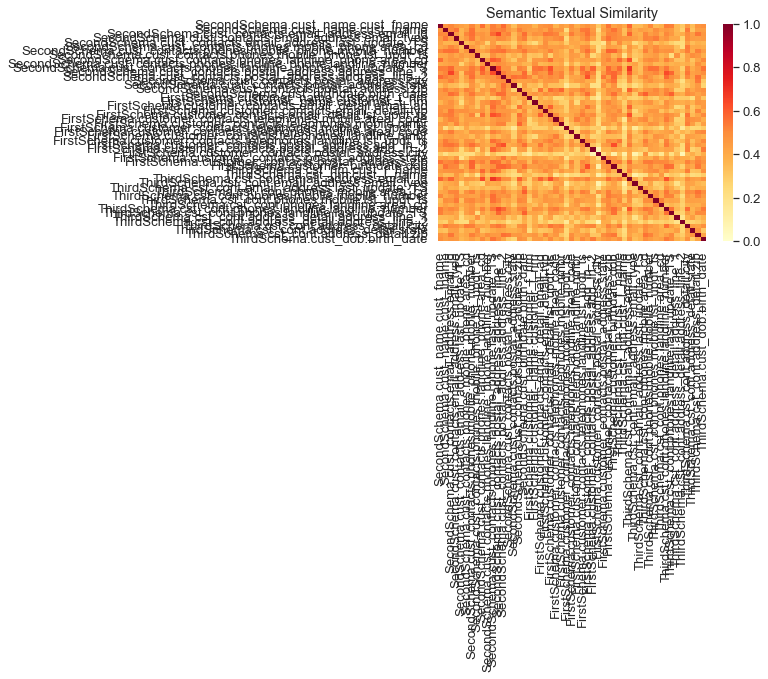

In [70]:
  run_and_plot(messages)

### 2.3 My Question on above code:
1. How can I use the above code to display similarity between elements

## 3. Embedding with Bert Model

In [81]:
#!pip install sentence-transformers

  Created wheel for sentence-transformers: filename=sentence_transformers-2.1.0-py3-none-any.whl size=121000 sha256=f15a78213fb72af6bc8f1d6f7bf63b1fd4b5341e04c749fff6d03d5f78625133
  Stored in directory: c:\users\write\appdata\local\pip\cache\wheels\17\1d\fd\a16123b417c527e0452c3e10ae5139cd2ab2f6fee93e892441
Successfully built sentence-transformers


In [82]:
from sentence_transformers import SentenceTransformer
import sys

In [83]:
bert_model = SentenceTransformer("bert-base-nli-mean-tokens")

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.95k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/399 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [85]:
def read_file_to_list(filename):
    lst_lines = []
    try:
        with open(filename) as f:
            lines = f.readlines()
            for line in lines:
                lst_lines.append(line.rstrip())
        return lst_lines
    except IOError:
        print("Error reading file: ", filename)

### 3.1 Read first file to a list

In [89]:
lst_sentences = read_file_to_list('test_A.csv')

In [91]:
sentences_embeddings = bert_model.encode(lst_sentences)

In [92]:
print("Simple BERT Embedding, vector-lenght:", len(sentences_embeddings[0]))

Simple BERT Embedding, vector-lenght: 768


In [93]:
print("Simple BERT Embedding, includes negative values:", sentences_embeddings[0])

Simple BERT Embedding, includes negative values: [ 9.95427668e-02 -2.57373244e-01  1.23406374e+00  5.92416108e-01
  8.58947337e-01 -2.45265335e-01  2.87849844e-01  7.36745059e-01
  4.03307844e-03  2.13149525e-02 -8.19666266e-01  7.38606215e-01
  2.08790556e-01  7.93696463e-01  7.96278536e-01 -5.68634868e-02
 -9.72587049e-01  2.35571980e-01  2.59318441e-01 -7.08567858e-01
  1.60241902e-01  7.84445226e-01 -3.24613988e-01 -3.89216751e-01
  1.61644533e-01 -3.56102318e-01 -1.93778835e-02 -1.63340521e+00
 -1.04034984e+00  4.09918278e-01 -2.16870829e-01 -1.67796254e-01
  4.55467887e-02  2.51648545e-01  4.03335303e-01 -1.23692945e-01
 -3.70390624e-01 -6.01144582e-02  4.67088252e-01 -2.26011395e-01
  1.06196761e+00  1.90251008e-01  7.33291686e-01 -2.66756982e-01
 -8.14961553e-01 -9.73117575e-02 -1.60942391e-01 -2.69566119e-01
  4.09474075e-01 -1.16911018e+00 -5.73005974e-01 -3.03388864e-01
  1.39415669e+00  3.74452472e-01 -7.22542182e-02 -2.30637208e-01
  8.04223478e-01 -1.11981809e+00  2.85615

### 3.2 Read second file - this gives strings to be compared 

In [94]:
lst_queries = read_file_to_list('test_B.csv')
queries_embedding = bert_model.encode(lst_queries)

### 3.3 Simple Cosine Similarity Function

In [95]:
def bert_cosine_similarity(u, v):
    return np.dot(u, v)/ (np.linalg.norm(u) * np.linalg.norm(v))

### 3.4 Compare Similarity between each element from file 1 with that of file 2
Produce a formattted list 

In [96]:
for i in range(len(lst_sentences)):
    for j in range(len(lst_queries)):
        similarity = bert_cosine_similarity(queries_embedding[j], sentences_embeddings[i])
        print(lst_sentences[i])
        print('\t' + '{}'.format(lst_queries[j]))
        print('\t\t', '{}'.format(similarity))

SecondSchema.cust_name.cust_fname
	ThirdSchema.cst_nm.cust_f_name
		 0.8918406963348389
SecondSchema.cust_name.cust_fname
	ThirdSchema.cst_nm.cust_l_name
		 0.8659627437591553
SecondSchema.cust_name.cust_fname
	ThirdSchema.cst_cont.email_address.email_id
		 0.7063217163085938
SecondSchema.cust_name.cust_fname
	ThirdSchema.cst_cont.email_address.email_type
		 0.7040298581123352
SecondSchema.cust_name.cust_fname
	ThirdSchema.cst_cont.email_address.last_update_TS
		 0.7356014847755432
SecondSchema.cust_name.cust_fname
	ThirdSchema.cst_cont.phones.mobile.area_cd
		 0.6123831272125244
SecondSchema.cust_name.cust_fname
	ThirdSchema.cst_cont.phones.mobile.mobile_number
		 0.5812923312187195
SecondSchema.cust_name.cust_fname
	ThirdSchema.cst_cont.phones.mobile.lst_updt_ts
		 0.6056284308433533
SecondSchema.cust_name.cust_fname
	ThirdSchema.cst_cont.phones.landline.area_cd
		 0.6342254877090454
SecondSchema.cust_name.cust_fname
	ThirdSchema.cst_cont.phones.landline.landline_number
		 0.60431921

		 0.6292779445648193
FirstSchema.customer_contacts.postal_address.add_ln_1
	ThirdSchema.cst_cont.phones.mobile.lst_updt_ts
		 0.6446698904037476
FirstSchema.customer_contacts.postal_address.add_ln_1
	ThirdSchema.cst_cont.phones.landline.area_cd
		 0.6873473525047302
FirstSchema.customer_contacts.postal_address.add_ln_1
	ThirdSchema.cst_cont.phones.landline.landline_number
		 0.6994600892066956
FirstSchema.customer_contacts.postal_address.add_ln_1
	ThirdSchema.cst_cont.phones.landline.last_update_TS
		 0.7048265933990479
FirstSchema.customer_contacts.postal_address.add_ln_1
	ThirdSchema.cst_cont.address_detail.address_line_1
		 0.7579700350761414
FirstSchema.customer_contacts.postal_address.add_ln_1
	ThirdSchema.cst_cont.address_detail.address_line_2
		 0.7092975974082947
FirstSchema.customer_contacts.postal_address.add_ln_1
	ThirdSchema.cst_cont.address_detail.city
		 0.6657513976097107
FirstSchema.customer_contacts.postal_address.add_ln_1
	ThirdSchema.cst_cont.address_detail.state
		

In [98]:
!pip install tabulate

### 3.5 Same similarity in tabular format

In [113]:
lst_dt = []
for i in range(len(lst_sentences)):
    for j in range(len(lst_queries)):
        similarity = bert_cosine_similarity(queries_embedding[j], sentences_embeddings[i])
        lst_dt.append([lst_sentences[i], lst_queries[j], similarity])
cols = ['Sentence', 'Query', '% Similarity']
print(tabulate(lst_dt[:7], headers=cols, tablefmt='pretty'))


+-----------------------------------+---------------------------------------------------+--------------------+
|             Sentence              |                       Query                       |    % Similarity    |
+-----------------------------------+---------------------------------------------------+--------------------+
| SecondSchema.cust_name.cust_fname |          ThirdSchema.cst_nm.cust_f_name           | 0.8918406963348389 |
| SecondSchema.cust_name.cust_fname |          ThirdSchema.cst_nm.cust_l_name           | 0.8659627437591553 |
| SecondSchema.cust_name.cust_fname |    ThirdSchema.cst_cont.email_address.email_id    | 0.7063217163085938 |
| SecondSchema.cust_name.cust_fname |   ThirdSchema.cst_cont.email_address.email_type   | 0.7040298581123352 |
| SecondSchema.cust_name.cust_fname | ThirdSchema.cst_cont.email_address.last_update_TS | 0.7356014847755432 |
| SecondSchema.cust_name.cust_fname |    ThirdSchema.cst_cont.phones.mobile.area_cd     | 0.6123831272125244 |
|

### 3.6 My Question
1. How can I use this method on each word instead of sentences

## 4. K - Means Clustering

In [114]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

### 4.1 Read file and while reading replace dot  .  with empty space ' ' and change to lower case

In [117]:
def read_file_with_modification(filename):
    lst = []
    try:
        with open(filename, 'r') as f:
            lines = f.readlines()
            for line in lines:
                lst.append(line.rstrip().replace('.', ' ').lower())
        return lst
    except IOError:
        print("Error reading file: ", filename)

In [121]:
pd.set_option('display.max_colwidth', 150)

In [122]:
file_data = read_file_with_modification('test_schema_wo_label.csv')

# Make a Pandas Dataframe from this file_data and name the column as 'details'
df = pd.DataFrame(file_data, columns=['details'])

# Inspect the dataframe
df.head()

,details
0,secondschema cust_name cust_fname
1,secondschema cust_name cust_lname
2,secondschema cust_contacts email_address email_id
3,secondschema cust_contacts email_address email_type
4,secondschema cust_contacts email_address last_update_ts


### 4.2 Instantiate CountVectorizer() and create a Bag of Words named bow

In [123]:
count_vect = CountVectorizer()
bow = count_vect.fit_transform(df['details'].values)

# Check the BoW shape
bow.shape

(51, 48)

In [125]:
embeded_data = bert_model.encode(file_data)

In [126]:
df_embeded = pd.DataFrame(embeded_data)

In [127]:
df_embeded.head()

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,-0.000307,-0.199761,1.248814,0.617943,0.877368,-0.272427,0.224582,0.605513,0.080373,0.082481,...,0.619128,-0.110509,0.179287,-0.166624,-0.128157,-0.073841,0.181049,-0.647236,-0.054590,0.421784
1,-0.124412,-0.056448,1.128472,0.557646,0.938645,-0.230195,0.094283,0.731661,0.155696,0.039702,...,0.406204,-0.199761,0.026285,0.034022,-0.179682,-0.377909,0.257246,-0.795690,0.026655,0.383303
2,-0.246311,0.724837,0.680095,0.200423,0.703122,-0.585414,0.799685,0.861360,-0.067050,-0.023505,...,0.429506,-0.699191,-0.507285,-0.266964,-0.379121,0.174970,0.108664,-0.288519,-0.177272,0.317477
3,-0.353636,0.558161,0.789645,0.219977,0.687210,-0.443162,0.850093,0.943572,-0.069753,-0.026191,...,0.664339,-0.702718,-0.323962,-0.300115,-0.314799,0.255867,0.065703,-0.404964,-0.254747,0.294020
4,-0.280213,0.375527,1.389083,0.231786,0.824935,-0.576302,1.122032,0.835436,-0.132034,0.007103,...,0.624251,-0.642873,-0.305161,-0.513693,-0.153257,0.208599,0.047061,-0.250204,-0.122835,0.358821


### 4.3 Try with Elbow Method to approximate no of clusters needed 

In [137]:
k_rng = range(1,11) 
sse = [] # sum of squared error
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df_embeded[[1, 2]]) # Consdier first two elemetns only
    sse.append(km.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


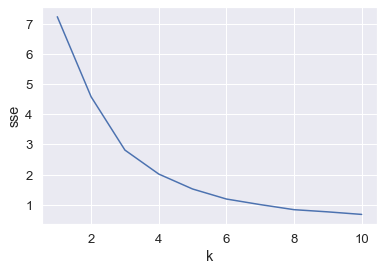

In [138]:
plt.xlabel('k')
plt.ylabel('sse')
plt.plot(k_rng, sse)

### 4.4 Resume with Number of Clusters as 6 from above figure

In [140]:
terms = count_vect.get_feature_names()
print(terms)

['add_ln_1', 'add_ln_2', 'address_detail', 'address_line_1', 'address_line_2', 'area_cd', 'area_code', 'birth_date', 'city', 'cst_cont', 'cst_nm', 'cust_birthdate', 'cust_contacts', 'cust_dob', 'cust_f_name', 'cust_fname', 'cust_l_name', 'cust_lname', 'cust_name', 'customer_birthdate', 'customer_contacts', 'customer_f_nm', 'customer_l_nm', 'customer_name', 'dob', 'email_ad', 'email_address', 'email_detail', 'email_id', 'email_type', 'firstschema', 'landline', 'landline_number', 'landline_phone', 'last_update_ts', 'lst_updt_ts', 'mobile', 'mobile_number', 'mobile_phone', 'nmbr', 'phones', 'postal_address', 'secondschema', 'state', 'telephones', 'thirdschema', 'typ', 'zip']


In [156]:
NO_OF_CLUSTERS = 6

In [157]:
km_model = KMeans(n_clusters=NO_OF_CLUSTERS, init='k-means++')
km_model.fit(bow)

KMeans(n_clusters=6)

In [160]:
labels = km_model.labels_
cluster_center = km_model.cluster_centers_

print("Labels are:")
print(labels)

print("Cluster Centers are:")
print(cluster_center)

Labels are:
[0 0 0 0 0 2 2 2 2 2 2 0 0 0 0 0 0 1 1 1 1 1 5 5 5 5 5 5 1 1 1 1 1 1 4 4 4
 4 4 3 3 3 3 3 3 4 4 4 4 4 4]
Cluster Centers are:
[[0.         0.         0.         0.09090909 0.09090909 0.
  0.         0.09090909 0.09090909 0.         0.         0.09090909
  0.72727273 0.         0.         0.09090909 0.         0.09090909
  0.18181818 0.         0.         0.         0.         0.
  0.         0.         0.27272727 0.         0.09090909 0.09090909
  0.         0.         0.         0.         0.09090909 0.
  0.         0.         0.         0.         0.         0.45454545
  1.         0.09090909 0.         0.         0.         0.09090909]
 [0.09090909 0.09090909 0.         0.         0.         0.
  0.         0.         0.09090909 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.09090909 0.72727273 0.09090909 0.09090909 0.18181818
  0.09090909 0.09090909 0.         0.27272727 0.         0.
  1.         0.         0.       

In [161]:
sile_score = metrics.silhouette_score(bow, labels, metric='euclidean')
print(sile_score)

0.18384397190964807


### 4.5 Give Labels of cluster to each text

In [162]:
df['BoW Cluster Label'] = km_model.labels_
df.head()

,details,BoW Cluster Label
0,secondschema cust_name cust_fname,0
1,secondschema cust_name cust_lname,0
2,secondschema cust_contacts email_address email_id,0
3,secondschema cust_contacts email_address email_type,0
4,secondschema cust_contacts email_address last_update_ts,0


In [163]:
counts = df.groupby(['BoW Cluster Label'])['details'].count()
print(counts)

BoW Cluster Label
0    11
1    11
2     6
3     6
4    11
5     6
Name: details, dtype: int64


### 4.6 See the contents of each cluster

In [165]:
order_centroids = km_model.cluster_centers_.argsort()[:, ::-1]
for i in range(NO_OF_CLUSTERS):
    print("\n")
    print("-"* 20)
    print("Cluster {}".format(i+1))
    print("-"* 20)
    for ind in order_centroids[i, :NO_OF_CLUSTERS]:
        print("{}".format(terms[ind]))



--------------------
Cluster 1
--------------------
secondschema
cust_contacts
postal_address
email_address
cust_name
city


--------------------
Cluster 2
--------------------
firstschema
customer_contacts
postal_address
email_detail
customer_name
add_ln_2


--------------------
Cluster 3
--------------------
secondschema
cust_contacts
phones
landline_phone
mobile_phone
area_cd


--------------------
Cluster 4
--------------------
cst_cont
thirdschema
phones
landline
mobile
area_cd


--------------------
Cluster 5
--------------------
thirdschema
cst_cont
address_detail
email_address
cst_nm
zip


--------------------
Cluster 6
--------------------
firstschema
customer_contacts
telephones
landline
mobile
lst_updt_ts


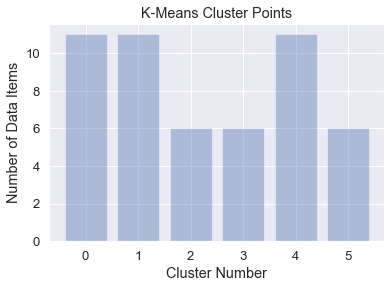

In [168]:
plt.bar([x for x in range(NO_OF_CLUSTERS)], df.groupby(['BoW Cluster Label'])['details'].count(), alpha=0.4)
plt.title('K-Means Cluster Points')
plt.xlabel('Cluster Number')
plt.ylabel('Number of Data Items')
plt.show()

### 4.7 Display which items are there in each cluster

In [171]:
for i in range(NO_OF_CLUSTERS):
    print('-'* 20)
    print("Cluster {}".format(i+1))
    print('-'* 20)
    print(df.iloc[df.groupby(['BoW Cluster Label']).groups[i]]['details'])
    print('\n')
    

--------------------
Cluster 1
--------------------
0                            secondschema cust_name cust_fname
1                            secondschema cust_name cust_lname
2            secondschema cust_contacts email_address email_id
3          secondschema cust_contacts email_address email_type
4      secondschema cust_contacts email_address last_update_ts
11    secondschema cust_contacts postal_address address_line_1
12    secondschema cust_contacts postal_address address_line_2
13              secondschema cust_contacts postal_address city
14             secondschema cust_contacts postal_address state
15               secondschema cust_contacts postal_address zip
16                      secondschema cust_birthdate birth_date
Name: details, dtype: object


--------------------
Cluster 2
--------------------
17                   firstschema customer_name customer_f_nm
18                   firstschema customer_name customer_l_nm
19       firstschema customer_contacts email_detai

### 4.8 My Question
1. Can you guide me on how this could be used for my case

## 5. DBSCAN 

In [172]:
from sklearn.cluster import DBSCAN
import gensim

In [173]:
dbs_data_list = read_file_with_modification('test_schema_wo_label.csv')
SIZE = 5

In [174]:
wrd2vec_model = gensim.models.Word2Vec(dbs_data_list, size=SIZE)

In [175]:
sent_vectors = []
for ddl in dbs_data_list:
    sent_vec = np.zeros(SIZE)
    cnt_words = 0
    for word in ddl:
        try:
            vec = wrd2vec_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)

sent_vectors = np.array(sent_vectors)
sent_vectors = np.nan_to_num(sent_vectors)

sent_vectors.shape

(51, 5)

In [180]:
vectorsize = sent_vectors.shape[0]
vectorsize

51

In [176]:
min_points = 2 * SIZE

In [177]:
def lower_bound(nums, target):
    l, r = 0, len(nums) - 1
    while l <= r:
        mid = int(l + (r - l)/2)
        if nums[mid] >= target:
            r = mid - 1
        else:
            l = mid + 1
    return l

In [186]:
def computer_SIZE_nearest_neighbor(x, data):
    dists = []
    for val in data:
        dist = np.sum((x - val)**2)
        if len(dists) == SIZE and dists[SIZE-1] > dist:
            l = int(lower_bound(dists, dist))
            if SIZE > l >= 0 and dists[l] > dist:
                dists[l] = dist
        else:
            dists.append(dist)
            dists.sort()
    return dists[SIZE-1]

In [189]:
neighbors = []
for val in sent_vectors[:vectorsize]:
    neighbors.append(computer_SIZE_nearest_neighbor(val, sent_vectors[:vectorsize]))
neighbors.sort()

### 5.1 Plot Elbow Curve 

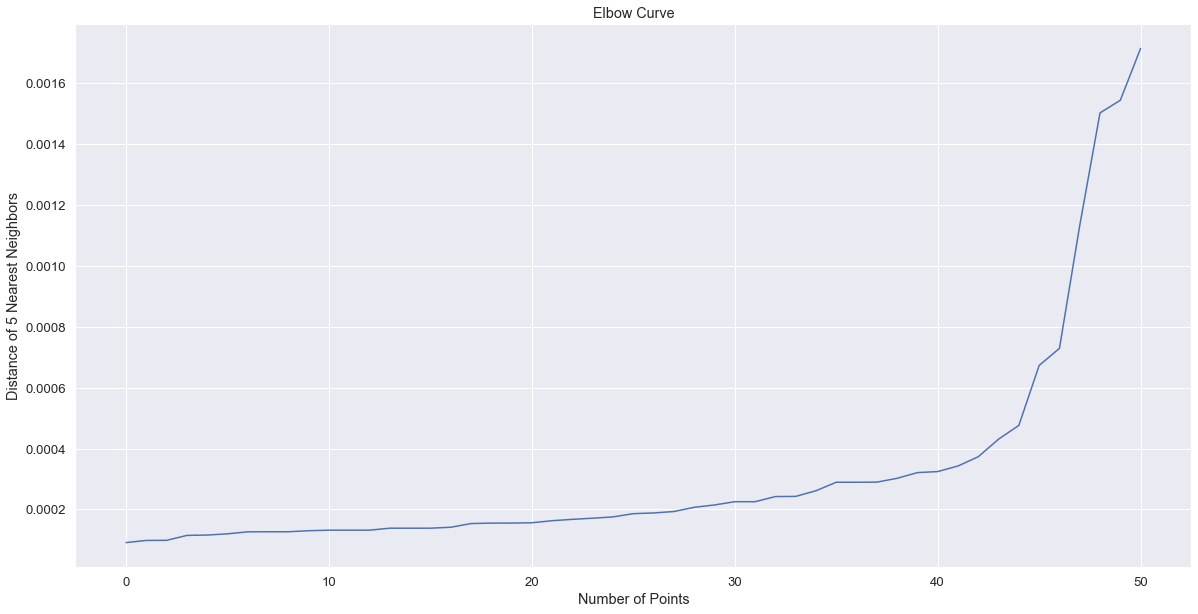

In [190]:
plt.figure(figsize=(20, 10))
plt.title("Elbow Curve")
plt.plot([x for x in range(len(neighbors))], neighbors)
plt.xlabel('Number of Points')
plt.ylabel('Distance of {} Nearest Neighbors'.format(SIZE))
plt.show()

In [191]:
dbscan_model = DBSCAN(eps=5, min_samples=min_points, n_jobs=1)
dbscan_model.fit(sent_vectors)

DBSCAN(eps=5, min_samples=10, n_jobs=1)

In [199]:
sent_vectors.shape

(51, 5)

In [205]:
dbscan_model.labels_.shape

(51,)

In [206]:
type(dbscan_model.labels_)

numpy.ndarray

In [207]:
type(sent_vectors)

numpy.ndarray

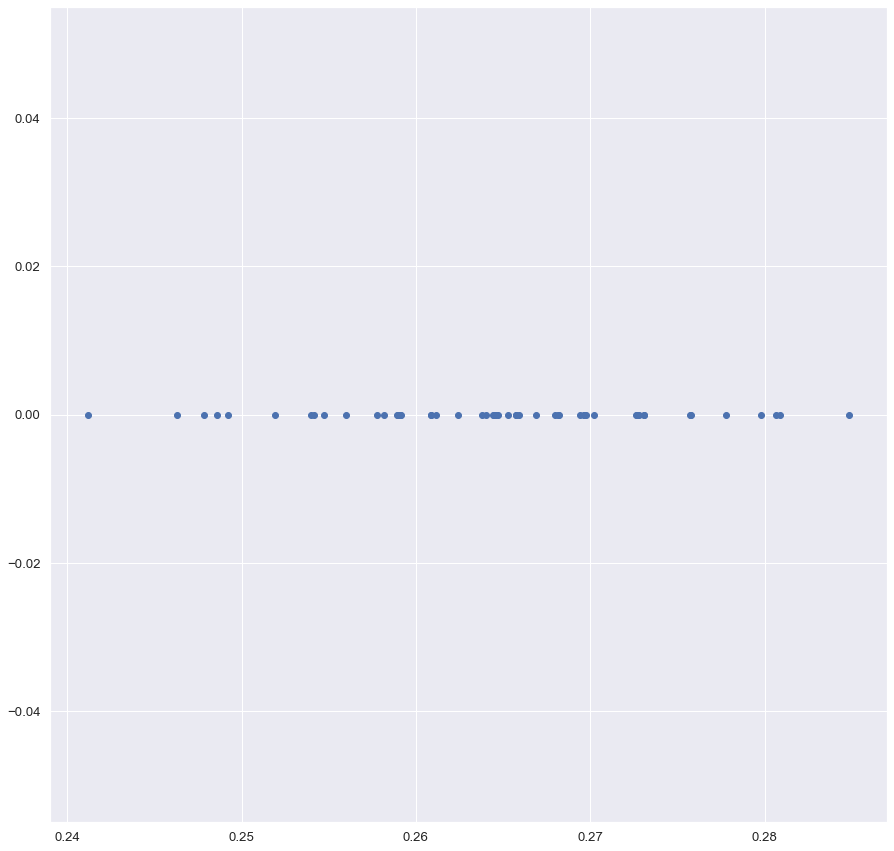

In [220]:
import matplotlib
plt.figure(figsize=(15, 15))
plt.scatter(sent_vectors[:, 0], dbscan_model.labels_)
plt.show()

### 5.2 My Question 
1. I have tried to read material on DBScan and could come upto this point. But I don't know how can this be useful?